## Shashank Rawat

### Task 3 :  To Explore Unsupervised Machine Learning 

### Objective :
**For the given ‘Iris’ dataset, predicting the optimum number of clusters and represent it visually.**

In [2]:
# importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import datasets

In [3]:
# Loading the Data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Basic Data Exploration: 

In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


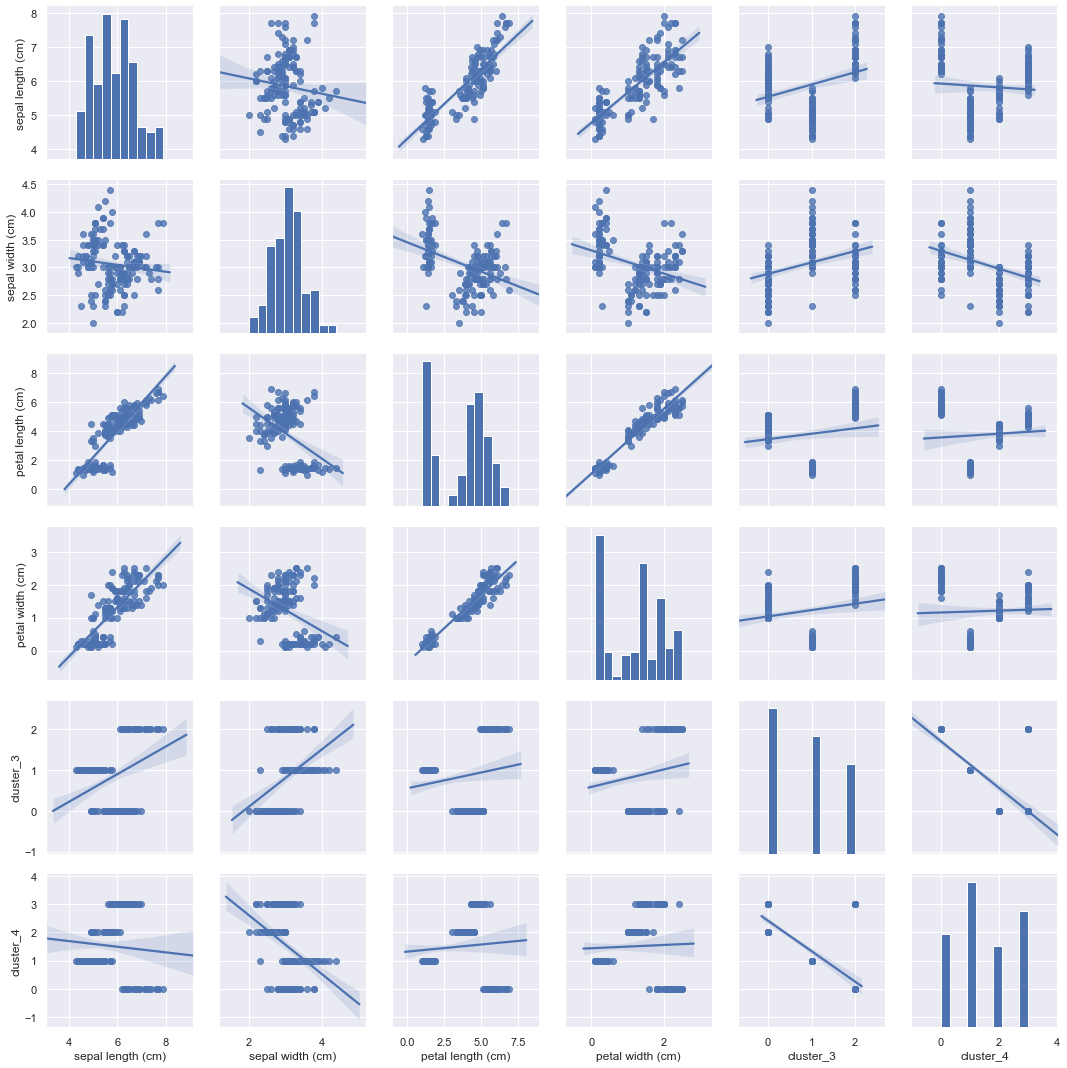

In [31]:
sns.pairplot(iris_df, kind="reg")

In [6]:
# importng libraries for clustering:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [7]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Outliers and Missing Value Check:

In [32]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(),
                      x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),
                      x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,
                         'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=iris_df.apply(var_summary)

In [33]:
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
sepal length (cm),150.0,0.0,876.5,5.843333,5.80,0.828066,0.685694,4.3,4.400,4.600,4.8,5.1,5.80,6.40,6.90,7.255,7.700,7.9
sepal width (cm),150.0,0.0,458.6,3.057333,3.00,0.435866,0.189979,2.0,2.200,2.345,2.5,2.8,3.00,3.30,3.61,3.800,4.151,4.4
petal length (cm),150.0,0.0,563.7,3.758000,4.35,1.765298,3.116278,1.0,1.149,1.300,1.4,1.6,4.35,5.10,5.80,6.100,6.700,6.9
petal width (cm),150.0,0.0,179.9,1.199333,1.30,0.762238,0.581006,0.1,0.100,0.200,0.2,0.3,1.30,1.80,2.20,2.300,2.500,2.5
cluster_3,150.0,0.0,126.0,0.840000,1.00,0.803349,0.645369,0.0,0.000,0.000,0.0,0.0,1.00,1.75,2.00,2.000,2.000,2.0
cluster_4,150.0,0.0,226.0,1.506667,1.00,1.103665,1.218076,0.0,0.000,0.000,0.0,1.0,1.00,3.00,3.00,3.000,3.000,3.0


**In the Dataset there are No missing value and Outliers.**

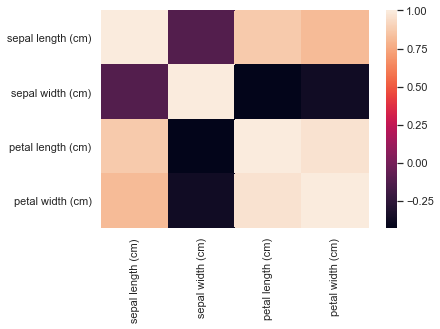

In [10]:
### visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(iris_df.corr())

## Choosing the Optimal Number of Clusters:

### Method 1:  Silhouette Coefficient

In [11]:
from sklearn import metrics

In [12]:
k_range = range(2, 11)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(iris_df)
    scores.append(metrics.silhouette_score(iris_df, km.labels_))

In [13]:
scores

[0.681046169211746,
 0.5528190123564091,
 0.4980505049972867,
 0.4887488870931048,
 0.3599431166074393,
 0.34835599537364553,
 0.33816584648484466,
 0.32456910734655303,
 0.3299794513162773]

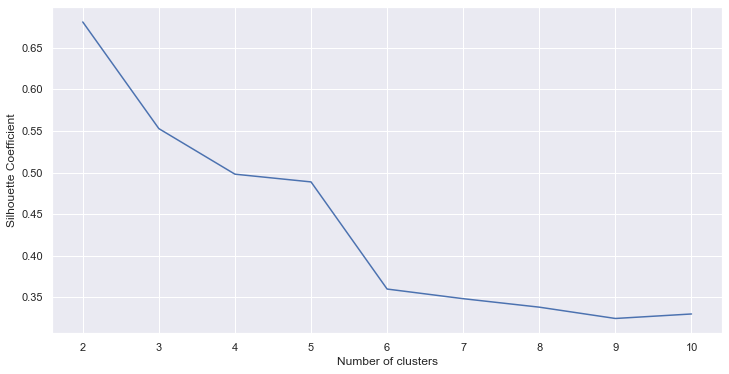

In [14]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### From Sc-Score optimal number of cluster is 3. 

### Method 2:  Elbow Analysis: 

In [15]:
cluster_range = range( 1, 11)
# Empty list for storing the value of WCSS.
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( iris_df )
    cluster_errors.append( clusters.inertia_ )

In [16]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.256009
4,5,46.446182
5,6,39.306107
6,7,34.356017
7,8,30.337772
8,9,27.862911
9,10,26.045097


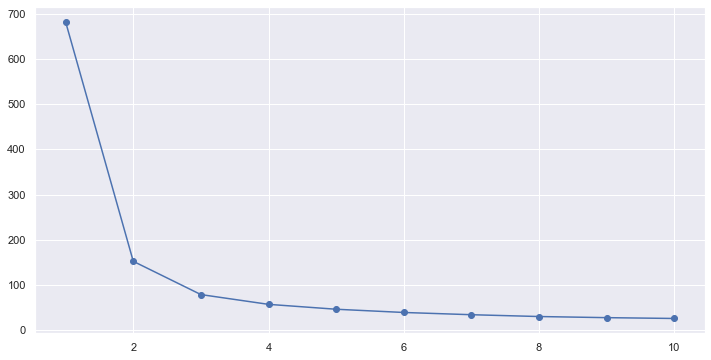

In [17]:
# Ploting the Elbow Curve.
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### From Elbow Analysis  optimal number of clusters are 3 and 4. 

In [18]:
km_3=KMeans(n_clusters=3,random_state=1).fit(iris_df)
km_4=KMeans(n_clusters=4,random_state=1).fit(iris_df)

In [19]:
km_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
km_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [21]:
km_4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0,
       3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3])

In [22]:
km_4.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [23]:
# Conactenating labels found through Kmeans with original Dataset 
iris_df['cluster_3'] = km_3.labels_
iris_df['cluster_4'] = km_4.labels_

#### Percentage distribution of Data in 3 Cluster Solution:

In [24]:
p=pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())
pd.DataFrame({'percentage Distribution':(p*100).round(2)})

,percentage Distribution
0,41.33
1,33.33
2,25.33


#### Percentage distribution of Data in 4 Cluster Solution:

In [25]:
p=pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())
pd.DataFrame({'percentage Distribution':(p*100).round(2)})

,percentage Distribution
1,33.33
3,26.67
0,21.33
2,18.67


**For 4 cluster solution : Data is not distributed propotionally as one cluster contains less than 20% (i.e. < 30) of data observation.     
Whereas, 3 cluster solution divides the data observation in good proportion   
Therefore, 3 Cluster Solution is best for Modelling**
    

## Final KMeans Clustering with N_cluster=3

In [26]:
# Defining predictors for modelling
x= iris_df.iloc[:, [0, 1, 2, 3]].values

In [27]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

## Visualization of Clusters:

### A) Based On Sepal Features:

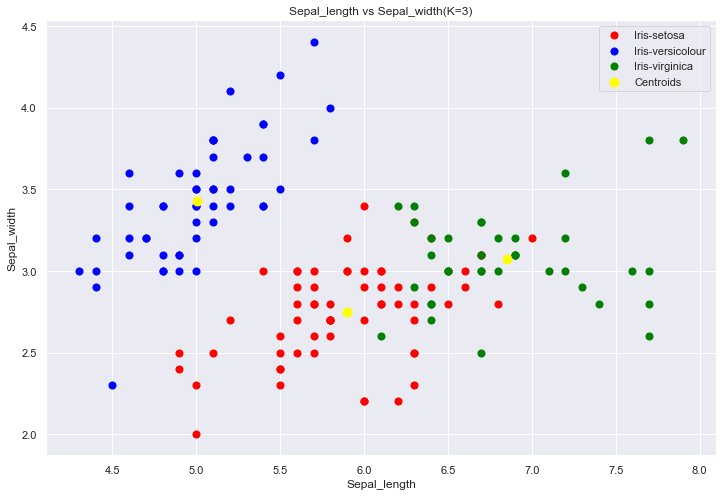

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=3)')
plt.legend()

### B) Based On Petal Features:

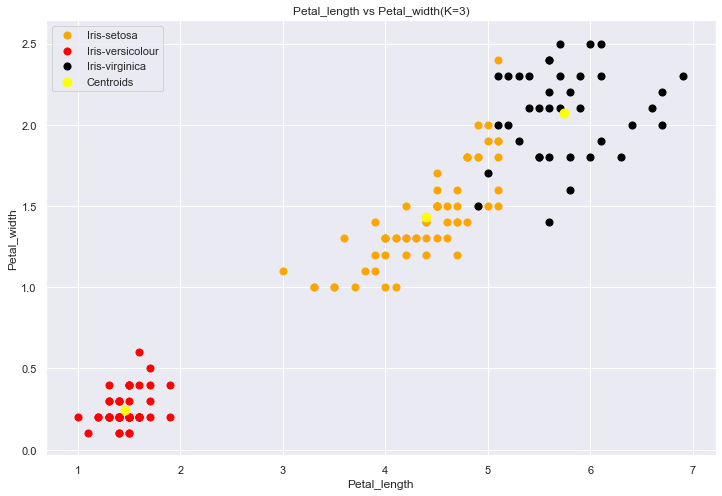

In [29]:
#Visualising the clusters 
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 50, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 50, c = 'black', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 80, c = 'yellow', label = 'Centroids')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=3)')
plt.legend()